In [148]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [150]:
np.random.seed(42)
n_samples = 100

weights = np.random.choice(range(30,150), size=n_samples, replace=False)
labels = np.random.choice([0, 1], size=n_samples)
dataset = np.column_stack((weights, labels))
print(dataset)

[[ 74   0]
 [ 77   1]
 [ 34   0]
 [ 85   1]
 [ 56   0]
 [ 94   0]
 [103   1]
 [ 40   1]
 [ 70   1]
 [137   0]
 [ 48   1]
 [ 92   0]
 [ 41   0]
 [ 66   1]
 [119   1]
 [121   0]
 [139   0]
 [ 30   1]
 [118   1]
 [134   1]
 [ 95   0]
 [ 75   0]
 [ 61   0]
 [100   0]
 [ 72   0]
 [ 42   0]
 [ 45   1]
 [144   0]
 [106   0]
 [127   0]
 [ 54   1]
 [108   0]
 [ 52   0]
 [126   1]
 [ 86   0]
 [140   0]
 [ 60   0]
 [ 83   0]
 [148   0]
 [ 39   1]
 [ 63   1]
 [ 55   1]
 [ 99   0]
 [ 58   0]
 [128   0]
 [115   1]
 [ 35   0]
 [120   0]
 [ 98   1]
 [ 69   0]
 [ 79   1]
 [ 65   1]
 [ 46   1]
 [ 96   0]
 [ 64   0]
 [143   0]
 [ 37   0]
 [ 73   0]
 [102   0]
 [ 97   0]
 [113   1]
 [ 57   0]
 [ 49   1]
 [125   0]
 [130   0]
 [ 38   0]
 [ 43   1]
 [114   1]
 [ 33   1]
 [ 47   1]
 [ 68   0]
 [147   1]
 [ 36   0]
 [107   0]
 [141   1]
 [124   1]
 [ 84   1]
 [ 80   1]
 [110   1]
 [ 76   1]
 [111   1]
 [ 91   1]
 [146   0]
 [109   1]
 [123   1]
 [ 71   0]
 [ 88   1]
 [ 78   0]
 [131   0]
 [ 87   1]
 [105   0]

In [152]:
X = dataset[:, :-1]
y = dataset[:, -1]
print(X)

[[ 74]
 [ 77]
 [ 34]
 [ 85]
 [ 56]
 [ 94]
 [103]
 [ 40]
 [ 70]
 [137]
 [ 48]
 [ 92]
 [ 41]
 [ 66]
 [119]
 [121]
 [139]
 [ 30]
 [118]
 [134]
 [ 95]
 [ 75]
 [ 61]
 [100]
 [ 72]
 [ 42]
 [ 45]
 [144]
 [106]
 [127]
 [ 54]
 [108]
 [ 52]
 [126]
 [ 86]
 [140]
 [ 60]
 [ 83]
 [148]
 [ 39]
 [ 63]
 [ 55]
 [ 99]
 [ 58]
 [128]
 [115]
 [ 35]
 [120]
 [ 98]
 [ 69]
 [ 79]
 [ 65]
 [ 46]
 [ 96]
 [ 64]
 [143]
 [ 37]
 [ 73]
 [102]
 [ 97]
 [113]
 [ 57]
 [ 49]
 [125]
 [130]
 [ 38]
 [ 43]
 [114]
 [ 33]
 [ 47]
 [ 68]
 [147]
 [ 36]
 [107]
 [141]
 [124]
 [ 84]
 [ 80]
 [110]
 [ 76]
 [111]
 [ 91]
 [146]
 [109]
 [123]
 [ 71]
 [ 88]
 [ 78]
 [131]
 [ 87]
 [105]
 [ 62]
 [142]
 [ 89]
 [ 93]
 [135]
 [ 67]
 [ 59]
 [145]
 [ 31]]


In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [156]:
# --------------------
# Step 3: Train Logistic Regression
# --------------------
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [158]:
# --------------------
# Step 4: Evaluation
# --------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       1.00      0.10      0.18        10

    accuracy                           0.55        20
   macro avg       0.76      0.55      0.44        20
weighted avg       0.76      0.55      0.44        20



In [160]:
kf = KFold(n_splits=5, shuffle=False)

# Cross-validation scores (accuracy)
scores = cross_val_score(model, X.reshape(-1,1), y, cv=kf, scoring="accuracy")

print("Cross-validation scores for each fold:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation scores for each fold: [0.45 0.75 0.6  0.4  0.55]
Mean Accuracy: 0.55


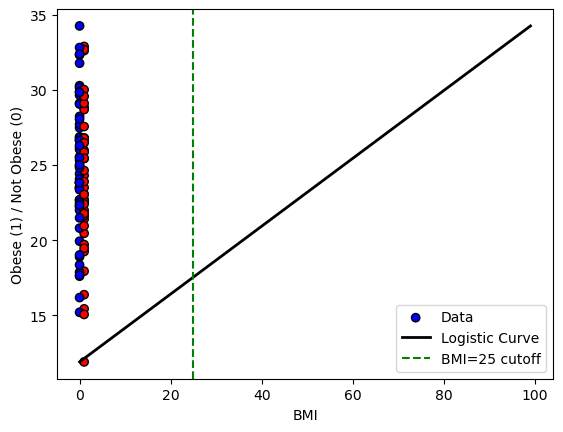

In [164]:
import matplotlib.pyplot as plt

# Predicted probabilities
bmi_range = np.linspace(min(bmi), max(bmi), 100).reshape(-1, 1)
probabilities = model.predict_proba(bmi_range)[:, 1]

plt.scatter(y,bmi, c=y, cmap="bwr", edgecolor="k", label="Data")
plt.plot(bmi_range, color="black", linewidth=2, label="Logistic Curve")
plt.axvline(25, color="green", linestyle="--", label="BMI=25 cutoff")
plt.xlabel("BMI")
plt.ylabel("Obese (1) / Not Obese (0)")
plt.legend()
plt.show()
